In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [2]:
# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates)) * 0.2 + np.random.rand(len(dates)) * 50
ts = pd.Series (values, index=dates)

In [3]:
# Dividir los datos en entrenamiento y prueba
train_data = ts[:'2022-10-01']
test_data = ts['2022-10-02':]


In [4]:
# Ajustar el modelo ARIMA
model = ARIMA (train_data, order=(10, 1, 10))
model_fit = model.fit()

C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
#Realizar el pronóstico
forecast = model_fit.forecast(steps=len(test_data))

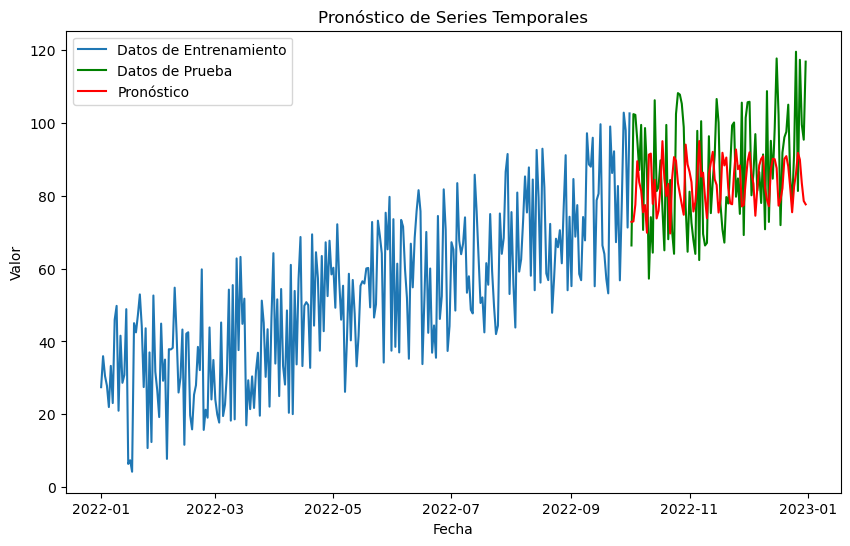

In [6]:
# Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color="green")
plt.plot(test_data.index, forecast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

## con dataset de KAGGLE
#### https://www.kaggle.com/datasets/ixhele/bitcoin-time-series
####  Contexto
#### Los datos representan series de tiempo históricas diarias para una moneda digital (BTC)
Rango de fecha de datos: 2018-05-11 al 2021-01-30

In [5]:
# Cargar el archivo CSV
file_path = 'bitcoin_usd.csv'  # Asegúrate de usar la ruta correcta del archivo
df = pd.read_csv(file_path)

# Mostrar las primeras filas para entender la estructura del DataFrame
print(df.head())

   Unnamed: 0  open_USD  high_USD   low_USD  close_USD  volume
0  2021-01-30  34246.28  34933.00  32825.00   34218.54   43072
1  2021-01-29  33368.18  38531.90  31915.40   34252.20  231827
2  2021-01-28  30362.19  33783.98  29842.10   33364.86   92621
3  2021-01-27  32464.01  32557.29  29241.72   30366.15   95911
4  2021-01-26  32254.19  32921.88  30837.37   32467.77   84972


In [6]:
# Renombrar la primera columna (que no tiene nombre) a 'NuevoNombre'
df.columns = ['fecha' if col == 'Unnamed: 0' else col for col in df.columns]

print(df)

          fecha  open_USD  high_USD   low_USD  close_USD  volume
0    2021-01-30  34246.28  34933.00  32825.00   34218.54   43072
1    2021-01-29  33368.18  38531.90  31915.40   34252.20  231827
2    2021-01-28  30362.19  33783.98  29842.10   33364.86   92621
3    2021-01-27  32464.01  32557.29  29241.72   30366.15   95911
4    2021-01-26  32254.19  32921.88  30837.37   32467.77   84972
..          ...       ...       ...       ...        ...     ...
995  2018-05-11   9002.21   9016.80   8341.00    8400.00   48227
996  2018-05-10   9310.00   9395.12   8970.00    9002.20   25055
997  2018-05-09   9178.00   9390.00   8965.00    9310.00   25673
998  2018-05-08   9365.00   9475.70   9060.54    9187.56   25533
999  2018-05-07   9661.02   9689.67   9181.00    9365.00   33787

[1000 rows x 6 columns]


In [7]:
print(df.head())

        fecha  open_USD  high_USD   low_USD  close_USD  volume
0  2021-01-30  34246.28  34933.00  32825.00   34218.54   43072
1  2021-01-29  33368.18  38531.90  31915.40   34252.20  231827
2  2021-01-28  30362.19  33783.98  29842.10   33364.86   92621
3  2021-01-27  32464.01  32557.29  29241.72   30366.15   95911
4  2021-01-26  32254.19  32921.88  30837.37   32467.77   84972


In [8]:
print(df.tail())

          fecha  open_USD  high_USD  low_USD  close_USD  volume
995  2018-05-11   9002.21   9016.80  8341.00    8400.00   48227
996  2018-05-10   9310.00   9395.12  8970.00    9002.20   25055
997  2018-05-09   9178.00   9390.00  8965.00    9310.00   25673
998  2018-05-08   9365.00   9475.70  9060.54    9187.56   25533
999  2018-05-07   9661.02   9689.67  9181.00    9365.00   33787


In [9]:
# Imprimir el tipo de datos y algunos valores únicos para la columna 'fecha'
print(df['fecha'].dtype)
print(df['fecha'].head())

object
0    2021-01-30
1    2021-01-29
2    2021-01-28
3    2021-01-27
4    2021-01-26
Name: fecha, dtype: object


In [10]:
# Convertir la columna de fecha a tipo datetime usando el formato correcto
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')  # Usa este formato si las fechas son 'YYYY-MM-DD'


In [11]:
# Configurar la columna de fecha como índice
df.set_index('fecha', inplace=True)

In [12]:
# Ordenar el índice por fecha
df.sort_index(inplace=True)

In [13]:
# Extraer la columna de precios de cierre
ts = df['close_USD']

In [14]:
# Verificar el índice de fechas
print(ts.index)

DatetimeIndex(['2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-12', '2018-05-13', '2018-05-14',
               '2018-05-15', '2018-05-16',
               ...
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30'],
              dtype='datetime64[ns]', name='fecha', length=1000, freq=None)


In [15]:
# Establecer la frecuencia del índice
df.index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

In [16]:
# Verificar y eliminar valores faltantes
print(ts.isna().sum())  # Verificar valores faltantes
ts = ts.dropna()  # Eliminar valores faltantes

0


In [17]:
# Dividir los datos en entrenamiento y prueba
train_data = ts[:'2019-10-01']
test_data = ts['2019-10-02':]

In [18]:
# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))  # Ajusta el orden del modelo si es necesario
model_fit = model.fit()

C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\deyvi.caicedo\AppData\Local\anaconda3

In [19]:
# Realizar el pronóstico
forecast = model_fit.forecast(steps=len(test_data))

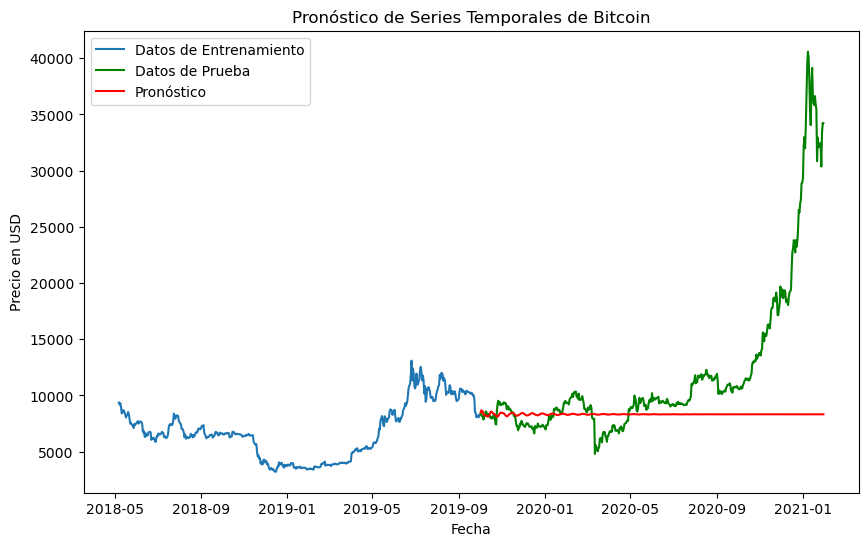

In [22]:


# Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color='green')
plt.plot(test_data.index, forecast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.show()

In [23]:
mae = mean_absolute_error(test_data, forecast)

In [25]:
print('Error absoluto medio (MAE):',mae)

Error absoluto medio (MAE): 4238.364686388019


In [41]:
# Definir el rango de fechas para el zoom (ajusta según sea necesario)
zoom_start = '2019-10-01'
zoom_end = '2019-10-10'

In [42]:
# Filtrar los datos para el rango de fechas de zoom
zoom_train_data = train_data[zoom_start:zoom_end]
zoom_test_data = test_data[zoom_start:zoom_end]
zoom_forecast = forecast[zoom_test_data.index]

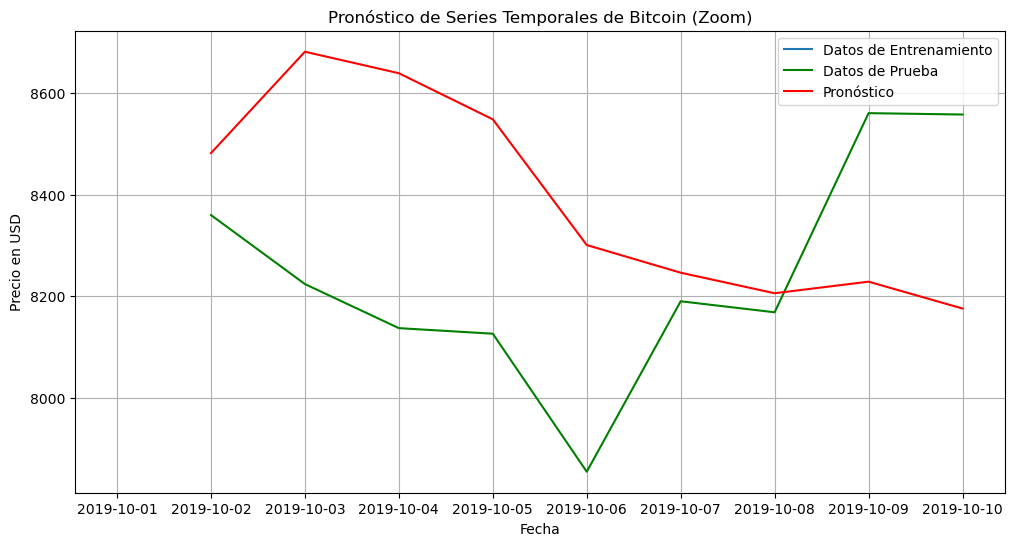

In [43]:
# Gráfica de los datos originales y el pronóstico con zoom
plt.figure(figsize=(12, 6))
plt.plot(zoom_train_data, label='Datos de Entrenamiento')
plt.plot(zoom_test_data, label='Datos de Prueba', color='green')
plt.plot(zoom_test_data.index, zoom_forecast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales de Bitcoin (Zoom)')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.show()

In [44]:
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(zoom_test_data, zoom_forecast)
print('Error absoluto medio (MAE):', mae)

Error absoluto medio (MAE): 306.5829453925792


In [20]:
# Definir el rango de fechas para el zoom (ajusta según sea necesario)
zoom_start = '2019-12-01'
zoom_end = '2019-12-20'

In [21]:
# Filtrar los datos para el rango de fechas de zoom
zoom_train_data = train_data[zoom_start:zoom_end]
zoom_test_data = test_data[zoom_start:zoom_end]
zoom_forecast = forecast[zoom_test_data.index]

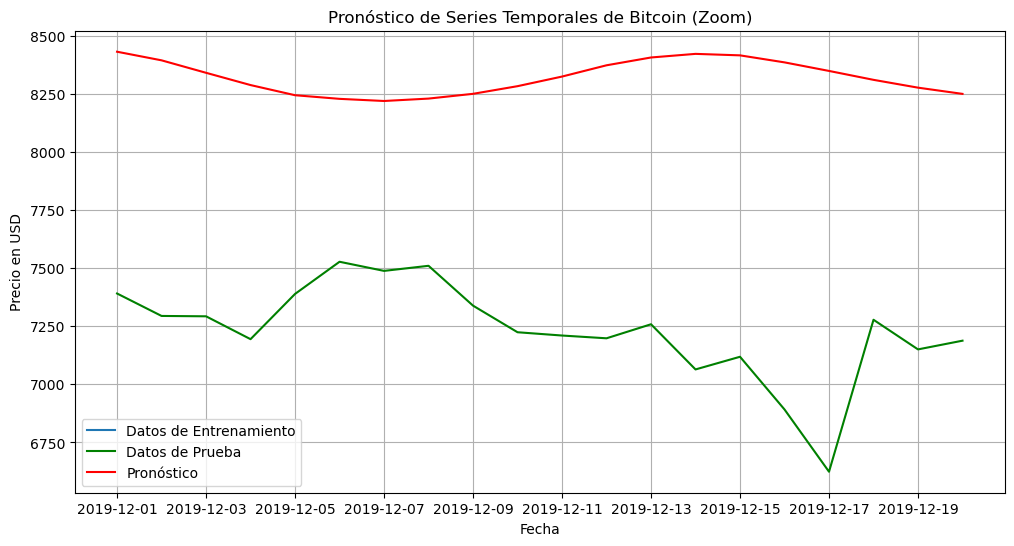

In [22]:
# Gráfica de los datos originales y el pronóstico con zoom
plt.figure(figsize=(12, 6))
plt.plot(zoom_train_data, label='Datos de Entrenamiento')
plt.plot(zoom_test_data, label='Datos de Prueba', color='green')
plt.plot(zoom_test_data.index, zoom_forecast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales de Bitcoin (Zoom)')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.show()

In [23]:
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(zoom_test_data, zoom_forecast)
print('Error absoluto medio (MAE):', mae)

Error absoluto medio (MAE): 1089.6935158946521
